# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнила студентка гр. 9382 Сорочина Мария, вариант 35.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Задача Коши.

Данная задача подразумевает собой поиск частного решения уравнения $y = \phi(x)$ из числа общих, удовлетворяющим некоторым условиям. Общий вид задачи Коши:

$\begin{cases}
f(x,y,y',...,y^{(n)})\\
y(x_0)=y_0\\
y'(x_0)=y_1\\
.\\
.\\
.\\
y^{(n-1)}(x_0)=y_{n-1}
\end{cases}$



## Постановка задачи

Дано дифференциальное уравнение:

$y'' = f(x, y), a < x < b$ (1)

и граничные условия

$y(a) = y_a, y(b) = y_b.$ (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a)=y_a$ $y'(a) = h.$ (3)

План решения основан на многократном решении задачи Коши (1), (3).
Значение решения задачи Коши при $x=b$ является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b,h)=y_b$ (4)

Это уравнение с одним неизвестным h.

Для его решения можно применить стандартный метод половинного
деления.

## Выполнение работы

$f(x,y)=ln(x+1)*y^2$

$y_0 = 1, \quad y_2 = 2$

Пусть $h_0 = 0$

y(b,0) = 2.110631590352486


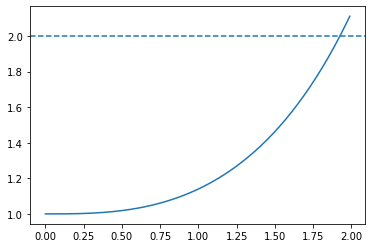

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

a = 0
b = 2
ya = 1
yb = 2
h0 = 0
step = 0.01

def f(y, x):
    return [y[1], np.log(x+1)*y[0]]

solve = odeint(f, [ya, h0],  np.arange(a, b, step))
print("y(b,0) =", solve[-1, 0])
plt.axhline(y=2, linestyle='--')
plt.plot(np.arange(a, b, step), solve[:,0])

y(b,0) = 2.110631590352486

$y(b,0) > y_b$

In [2]:
delta = -0.01
ybh = solve[-1, 0]
hm = h0


while ybh > yb:
    hm += delta
    solve = odeint(f, [ya, hm],  np.arange(a, b, step))
    ybh = solve[-1, 0]
    #print(ybh)
    
print("y(b, h_m) =", ybh, ", h_m =", hm, ", h_m-1 =", hm-delta)
    

y(b, h_m) = 1.9914773080015842 , h_m = -0.04 , h_m-1 = -0.03


y(b, h_m) = 1.9914773080015842 , h_m = -0.04 , h_m-1 = -0.03

Искомое значение попало в промежуток (-0.03, -0.04 )

In [3]:
hm1 = hm-delta
ym = ybh
ym1 = odeint(f, [ya, hm1],  np.arange(a, b, step))[-1,0]
M = 100

while abs(ym-ym1) > 0.001 and M > 0:
    M -= 1
    center = (hm + hm1) / 2
    newY = odeint(f, [ya, center],  np.arange(a, b, step))[-1,0]
    #print(hm1, hm, newY, ym1, ym)
    if newY <= ym1 and newY <= yb:
        ym1 = newY
        hm1 = center
    else:
        ym = newY
        hm = center
        
print(ym1, "\t", ym)
print(center)

2.021265878282879 	 2.020334985458899
-0.0303125


2.021265878282879 	$\quad$   2.020334985458899 

h = -0.0303125


## Выводы.

В ходе выполнения работы при помощи python была решена краевая задача для уравнения второго порядка путем многократного решения задачи Коши.